# Yelp Data Preprocessing


Jun 2017

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

Files:

* "business.json": Contains business data including location data, attributes, and categories.
* "checkin.json": Contains full review text data including the user_id that wrote the review and the business_id the review is written for.
* "review.json": User data including the user's friend mapping and all the metadata associated with the user.
* "tip.json": Checkins on a business.
* "user.json": Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.


## Read data from file and load to Pandas DataFrame


In [2]:
import json
import pandas as pd

In [3]:
file_business, file_checkin, file_review, file_tip, file_user = [
    './dataset/business.json',
    './dataset/checkin.json',
    './dataset/review.json',
    './dataset/tip.json',
    './dataset/user.json'
]

#### Business Data

In [4]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)       ### json.loads()

In [5]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC


In [6]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      156639 non-null object
business_id     156639 non-null object
categories      156639 non-null object
city            156639 non-null object
hours           156639 non-null object
is_open         156639 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156639 non-null object
neighborhood    156639 non-null object
postal_code     156639 non-null object
review_count    156639 non-null int64
stars           156639 non-null float64
state           156639 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 17.9+ MB


#### Checkin Data

In [ ]:
# with open(file_checkin) as f:
#     df_checkin = pd.DataFrame(json.loads(line) for line in f)
# df_checkin.head(2)

#### Review Data

In [ ]:
# with open(file_review) as f:
#     df_review = pd.DataFrame(json.loads(line) for line in f)
# df_review.head(2)

#### Tip Data

In [ ]:
# with open(file_tip) as f:
#     df_tip = pd.DataFrame(json.loads(line) for line in f)
# df_tip.head(2)

#### User Data

In [ ]:
# with open(file_user) as f:
#     df_user = pd.DataFrame(json.loads(line) for line in f)
# df_user.head(2)

## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
* that are located in "Las Vegas"
* that contains "Restaurants" in their category (You may need to filter null categories first)

In [9]:
# Create Pandas DataFrame filters
# Find the names in cities that could match "Las Vegas"
import re
cities_in_df = list(df_business['city'].unique())
cities_with_Las = [x for x in cities_in_df if re.match('Las', x)]
cities_with_las = [x for x in cities_in_df if re.match('las', x)]
cities_with_Las.extend(cities_with_las)
print(cities_with_Las)

['Las Vegas', 'Lasalle', 'Las vegas', 'Lasswade', 'Las  Vegas', 'Las Vegas Strip', 'Las Vegas, NV', 'Las Vegass', 'Las Vegas NV', 'Las Vegas East', 'LasVegas', 'las vegas']


In [10]:
# Transform some inconsistent way of "Las Vegas"
df_business.loc[df_business['city'] == 'Las vegas', 'city'] = 'Las Vegas'
df_business.loc[df_business['city'] == 'Las  Vegas', 'city'] = 'Las Vegas'
df_business.loc[df_business['city'] == 'Las Vegas Strip', 'city'] = 'Las Vegas'
df_business.loc[df_business['city'] == 'Las Vegas, NV', 'city'] = 'Las Vegas'
df_business.loc[df_business['city'] == 'Las Vegass', 'city'] = 'Las Vegas'
df_business.loc[df_business['city'] == 'Las Vegas NV', 'city'] = 'Las Vegas'
df_business.loc[df_business['city'] == 'Las Vegas East', 'city'] = 'Las Vegas'
df_business.loc[df_business['city'] == 'LasVegas', 'city'] = 'Las Vegas'
df_business.loc[df_business['city'] == 'las vegas', 'city'] = 'Las Vegas'

In [11]:
# businesses that are located in Las Vegas
target_city = df_business['city'] == 'Las Vegas'

# 'categories' != null
category_non_null = df_business['categories'].notnull()   ### pd.isnull(), pd.notnull()

# 'categories' contains 'Restaurants' or 'Food'
category_restaurant = df_business['categories'].apply(str).str.contains('Restaurants|Food')

In [12]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business[target_city & category_non_null & category_restaurant]
df_filtered.shape

(7312, 15)

#### Keep relevant columns

* only keep some useful columns
* business_id
* name
* categories
* stars

In [13]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [14]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]
df_selected_business.head()

,business_id,name,categories,stars
58,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"[Restaurants, American (Traditional), Mexican,...",3.0
64,QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"[Mexican, Restaurants]",3.5
90,DiA78qPtp6rfRNdomzjBbw,Joshan Filipino Oriental Market,"[Chinese, Food, Convenience Stores, Restaurants]",3.5
107,YTqtM2WFhcMZGeAGA08Cfg,Mariscos Playa Escondida,"[Seafood, Restaurants, Specialty Food, Ethnic ...",4.5
116,Oto60yDwk1z72WmfWEYrjg,Baja Miguel's,"[Food, Restaurants, Mexican]",3.0


In [15]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(index=str, columns={"stars":"avg_stars"}, inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [16]:
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7312 entries, 58 to 156635
Data columns (total 4 columns):
business_id    7312 non-null object
name           7312 non-null object
categories     7312 non-null object
avg_stars      7312 non-null float64
dtypes: float64(1), object(3)
memory usage: 285.6+ KB


#### Save results to csv files

In [17]:
df_selected_business.to_csv(path_or_buf='selected_business.csv', sep=',', index=False, encoding='utf-8')

In [18]:
# Try reload the csv file to check if everything works fine
df_buz_test = pd.read_csv('selected_business.csv')
df_buz_test.head()

,business_id,name,categories,avg_stars
0,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"['Restaurants', 'American (Traditional)', 'Mex...",3.0
1,QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"['Mexican', 'Restaurants']",3.5
2,DiA78qPtp6rfRNdomzjBbw,Joshan Filipino Oriental Market,"['Chinese', 'Food', 'Convenience Stores', 'Res...",3.5
3,YTqtM2WFhcMZGeAGA08Cfg,Mariscos Playa Escondida,"['Seafood', 'Restaurants', 'Specialty Food', '...",4.5
4,Oto60yDwk1z72WmfWEYrjg,Baja Miguel's,"['Food', 'Restaurants', 'Mexican']",3.0


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [19]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA


#### Prepare dataframes to be joined, - on business_id

In [20]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')
df_left.head()

,name,categories,avg_stars
business_id,,,
LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"[Restaurants, American (Traditional), Mexican,...",3.0
QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"[Mexican, Restaurants]",3.5
DiA78qPtp6rfRNdomzjBbw,Joshan Filipino Oriental Market,"[Chinese, Food, Convenience Stores, Restaurants]",3.5
YTqtM2WFhcMZGeAGA08Cfg,Mariscos Playa Escondida,"[Seafood, Restaurants, Specialty Food, Ethnic ...",4.5
Oto60yDwk1z72WmfWEYrjg,Baja Miguel's,"[Food, Restaurants, Mexican]",3.0


In [21]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')
df_right.shape

(4736897, 8)

#### Join and reset index

In [22]:
df_joined = df_right.join(df_left, how = 'inner')
df_joined.reset_index(inplace = True)
df_joined.shape

(917463, 12)

#### Further filter data by date, keep comments from last 2 years

In [23]:
import datetime
# Make a filter that selects date after 2015-06-30

# First, change the data type of column 'date' to datetime
df_joined['date'] = pd.to_datetime(df_joined['date'])

# Select dates after '2015-06-30'
col_last_2_years = df_joined['date'] > datetime.date(2015,6,30)

In [24]:
# Filter the joined DataFrame and name it as df_final
df_final = df_joined[col_last_2_years]

In [25]:
df_final.shape

(400119, 12)

#### Take a glance at the data

In [26]:
import matplotlib.pyplot as plt
% matplotlib inline

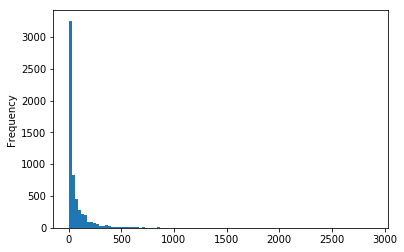

In [27]:
# Calculate counts of reviews per business entity, and plot it
df_final['business_id'].value_counts().plot.hist(bins = 100)

#### Save the file as csv file

In [28]:
df_final.to_csv('last_2_years_restaurant_reviews.csv', index=False, encoding='utf-8')